In [17]:
import pandas as pd

file_path = 'sample/bds_hn_data_cleaned.csv'
df = pd.read_csv(file_path)

In [18]:
print(df.head())

  published_date            location              home_type  price   area  \
0     07/10/2025     Gia Lâm, Hà Nội        căn hộ chung cư   4.72   75.0   
1     07/10/2025    Đông Anh, Hà Nội                    đất   4.28   72.0   
2     07/10/2025  Đan Phượng, Hà Nội  nhà biệt thự, liền kề  38.30  288.0   
3     07/10/2025     Gia Lâm, Hà Nội        căn hộ chung cư   2.75   43.0   
4     07/10/2025     Đống Đa, Hà Nội              nhà riêng   3.85   18.0   

   bedroom   wc      legal_status         furniture  
0      3.0  2.0  có sổ đỏ/sổ hồng            Đầy đủ  
1      0.0  0.0  không có - Thiếu  Không có - Thiếu  
2      3.0  3.0  không có - Thiếu  Không có - Thiếu  
3      1.0  3.0  có sổ đỏ/sổ hồng  Không có - Thiếu  
4      2.0  1.0  có sổ đỏ/sổ hồng  Không có - Thiếu  


Co giãn

In [19]:
import numpy as np

# Các cột số để co giãn
numeric_cols = ['price', 'area', 'bedroom', 'wc']

# Co giãn
for col in numeric_cols:
    min_values = df[col].min()
    max_values = df[col].max()

    if (max_values - min_values) != 0:
        # Gán thẳng kết quả co giãn vào cột cũ
        df.loc[:, col] = [(x - min_values) / (max_values - min_values) for x in df[col]]
    else:
        df.loc[:, col] = 0 # Nếu min = max, gán 0

print("Mô tả các cột số của 'df' sau khi co giãn:")
print(df[numeric_cols].describe())
df.to_csv('sample/bds_hn_data_scaled.csv', index=False)


Mô tả các cột số của 'df' sau khi co giãn:
             price         area      bedroom           wc
count  3709.000000  3709.000000  3709.000000  3709.000000
mean      0.140200     0.258579     0.320212     0.191214
std       0.140843     0.165718     0.200369     0.125841
min       0.000000     0.000000     0.000000     0.000000
25%       0.058792     0.144543     0.222222     0.142857
50%       0.096297     0.218289     0.333333     0.214286
75%       0.160592     0.312684     0.444444     0.214286
max       1.000000     1.000000     1.000000     1.000000


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

Biểu đồ

In [21]:

# Thiết lập hiển thị tiếng Việt và giao diện
plt.style.use('seaborn-v0_8')
sns.set(font_scale=1.05)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (9,6)
plt.rcParams['font.family'] = 'DejaVu Sans'

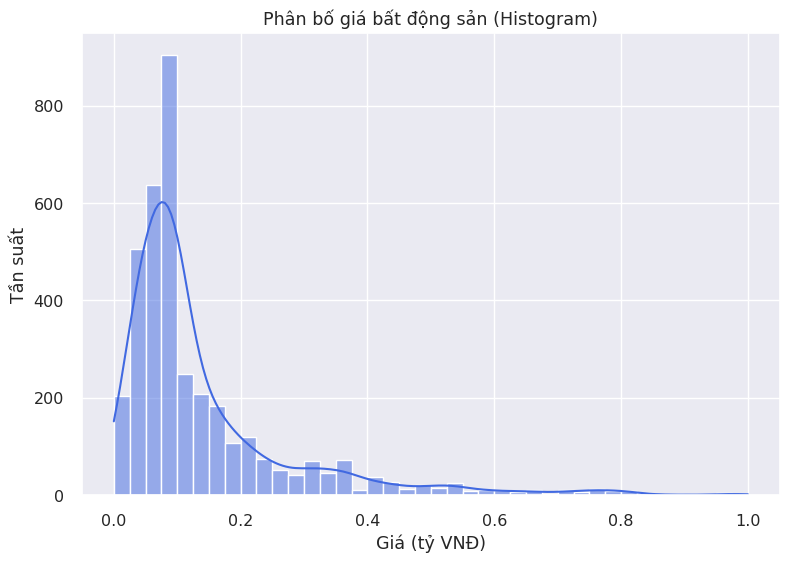

In [22]:
# 1️ HISTOGRAM - Phân bố giá bất động sản

plt.figure()
sns.histplot(df['price'], bins=40, kde=True, color='royalblue')
plt.title("Phân bố giá bất động sản (Histogram)")
plt.xlabel("Giá (tỷ VNĐ)")
plt.ylabel("Tần suất")
plt.show()

/var/folders/wg/c6bdg_094yn3nxtc6l2zfrdc0000gn/T/ipykernel_57606/839096195.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


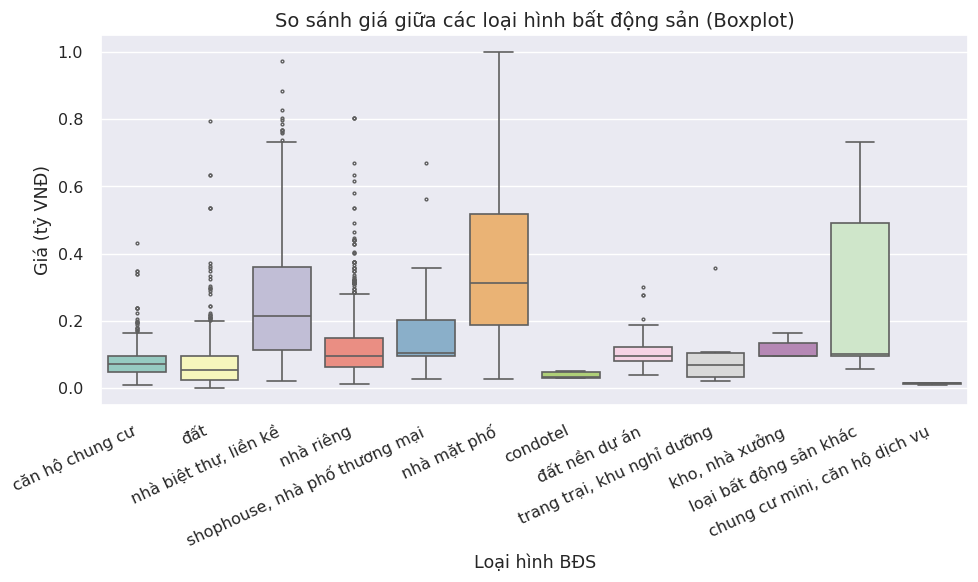

In [23]:
# 2️ BOXPLOT - So sánh giá theo loại hình

plt.figure(figsize=(10,6))
sns.boxplot(
    x='home_type',
    y='price',
    data=df,
    palette='Set3',
    linewidth=1.2,
    fliersize=2
)
plt.title("So sánh giá giữa các loại hình bất động sản (Boxplot)", fontsize=14)
plt.xlabel("Loại hình BĐS")
plt.ylabel("Giá (tỷ VNĐ)")
plt.xticks(rotation=25, ha='right')
plt.tight_layout()
plt.show()

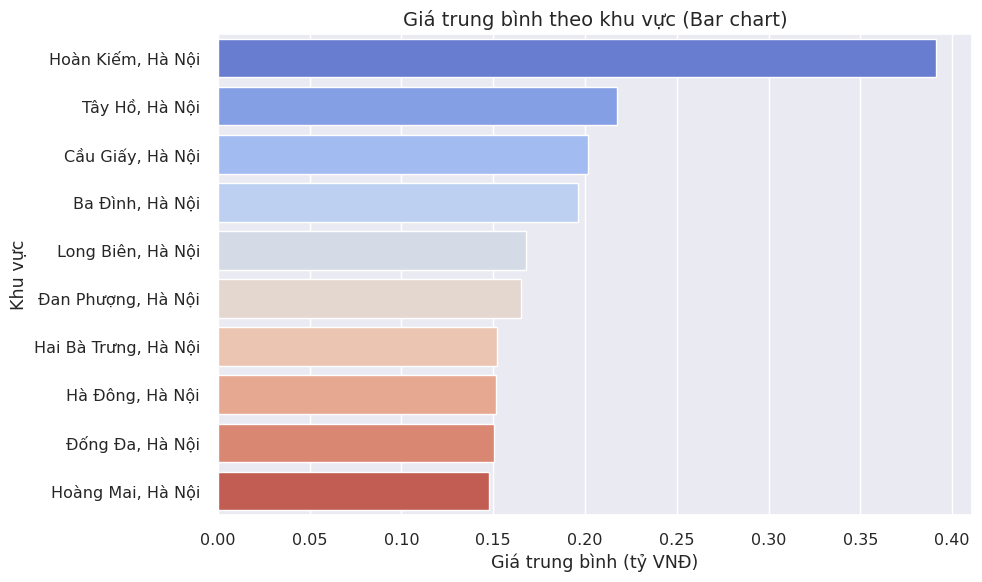

In [24]:
# 3️ BAR CHART - Giá trung bình theo khu vực

plt.figure(figsize=(10,6))
avg_price = df.groupby('location', as_index=False)['price'].mean().sort_values('price', ascending=False).head(10)
sns.barplot(
    data=avg_price,
    x='price',
    y='location',
    hue='location',
    palette='coolwarm',
    legend=False
)
plt.title("Giá trung bình theo khu vực (Bar chart)", fontsize=14)
plt.xlabel("Giá trung bình (tỷ VNĐ)")
plt.ylabel("Khu vực")
plt.tight_layout()
plt.show()

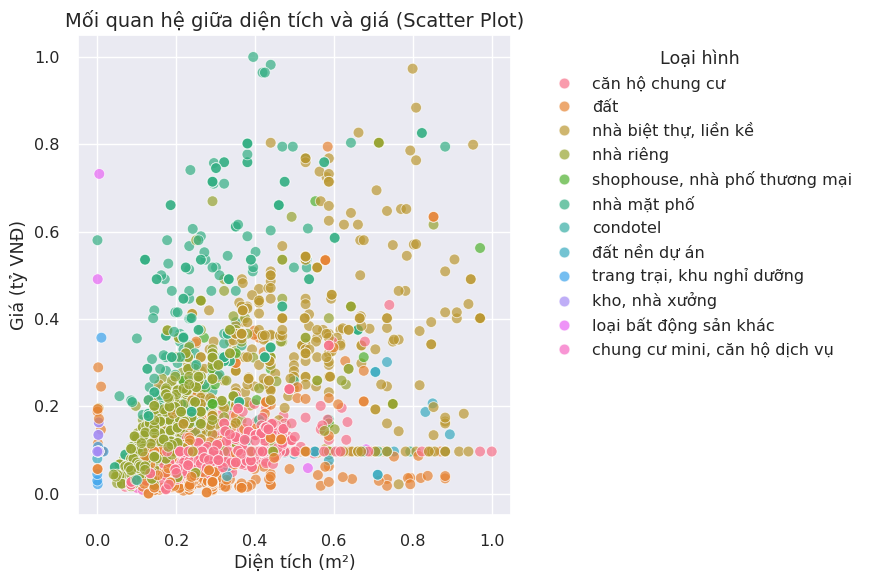

In [25]:
# 4️ SCATTER PLOT - Quan hệ giữa diện tích và giá

plt.figure(figsize=(9,6))
sns.scatterplot(
    x='area', y='price', data=df, hue='home_type',
    alpha=0.7, s=60
)
plt.title("Mối quan hệ giữa diện tích và giá (Scatter Plot)", fontsize=14)
plt.xlabel("Diện tích (m²)")
plt.ylabel("Giá (tỷ VNĐ)")
# Di chuyển chú thích ra ngoài để không che
plt.legend(title='Loại hình', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

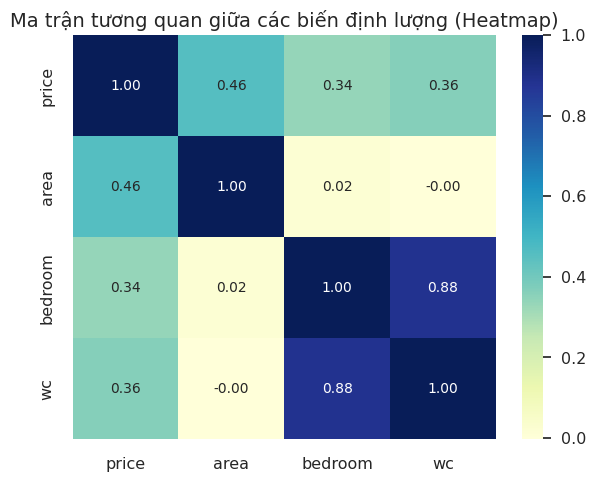

In [26]:
# 5️ HEATMAP - Ma trận tương quan giữa các biến

plt.figure(figsize=(6,5))
corr = df[['price','area','bedroom','wc']].corr()
sns.heatmap(
    corr, annot=True, cmap='YlGnBu', fmt=".2f",
    annot_kws={'size':10}
)
plt.title("Ma trận tương quan giữa các biến định lượng (Heatmap)", fontsize=14)
plt.tight_layout()
plt.show()


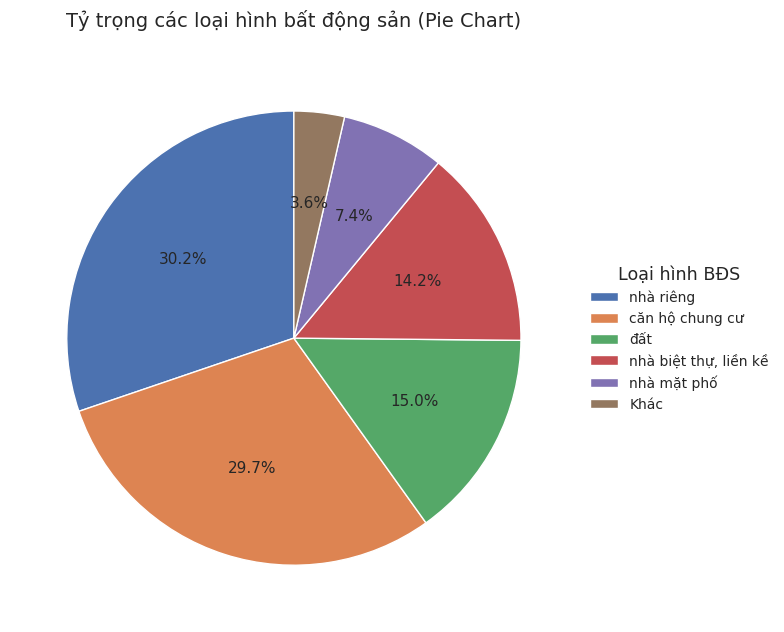

In [27]:
# 6️ PIE CHART - Tỷ trọng loại hình BĐS

plt.figure(figsize=(8,8))

# Đếm tần suất loại hình
home_counts = df['home_type'].value_counts()

# Gộp các loại chiếm < 5% vào nhóm "Khác"
threshold = 0.05 * home_counts.sum()
home_counts_mod = home_counts.copy()
home_counts_mod[home_counts < threshold] = 0
other_sum = home_counts[home_counts < threshold].sum()

# Tạo Series mới với nhóm "Khác"
home_counts_final = home_counts_mod[home_counts_mod > 0]
if other_sum > 0:
    home_counts_final["Khác"] = other_sum

# Vẽ biểu đồ tròn
wedges, texts, autotexts = plt.pie(
    home_counts_final.values,
     labels=None,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize':11}
)

# Thêm chú thích (legend) bên phải
plt.legend(
    wedges, home_counts_final.index,
    title="Loại hình BĐS",
    loc="center left",
    bbox_to_anchor=(1.0, 0.5),
    fontsize=10
)

plt.title("Tỷ trọng các loại hình bất động sản (Pie Chart)", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

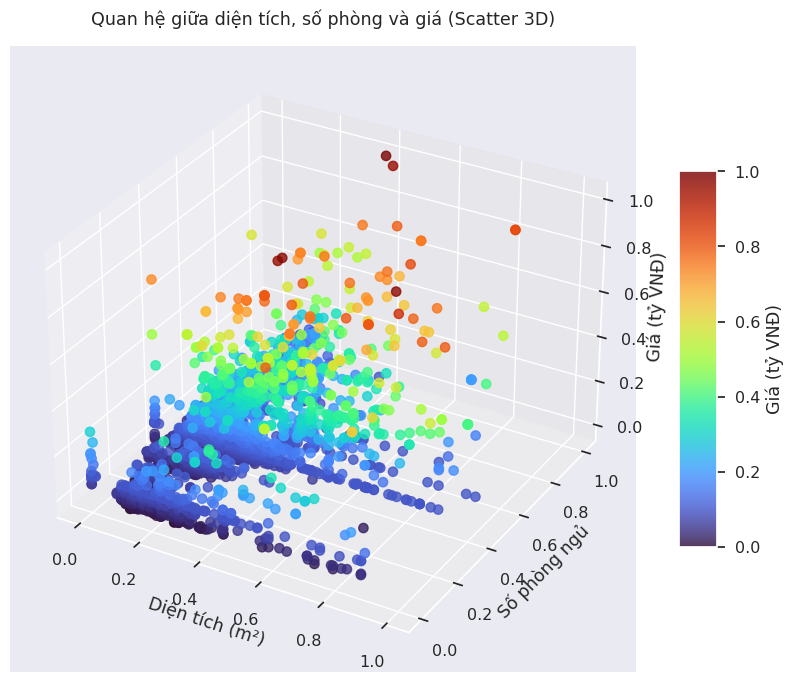

In [28]:
# 7️ SCATTER 3D - Quan hệ giữa diện tích, số phòng và giá

from mpl_toolkits.mplot3d import Axes3D

# Lọc dữ liệu hợp lệ
df_3d = df[['area', 'bedroom', 'price']].dropna()

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')

# Vẽ điểm 3D
sc = ax.scatter(
    df_3d['area'],
    df_3d['bedroom'],
    df_3d['price'],
    c=df_3d['price'], cmap='turbo', s=45, alpha=0.8
)

# Thêm thanh màu
plt.colorbar(sc, ax=ax, shrink=0.6, aspect=10, label="Giá (tỷ VNĐ)")

# Gán nhãn trục
ax.set_xlabel("Diện tích (m²)")
ax.set_ylabel("Số phòng ngủ")
ax.set_zlabel("Giá (tỷ VNĐ)")

ax.set_title("Quan hệ giữa diện tích, số phòng và giá (Scatter 3D)", pad=15)
plt.tight_layout()
plt.show()


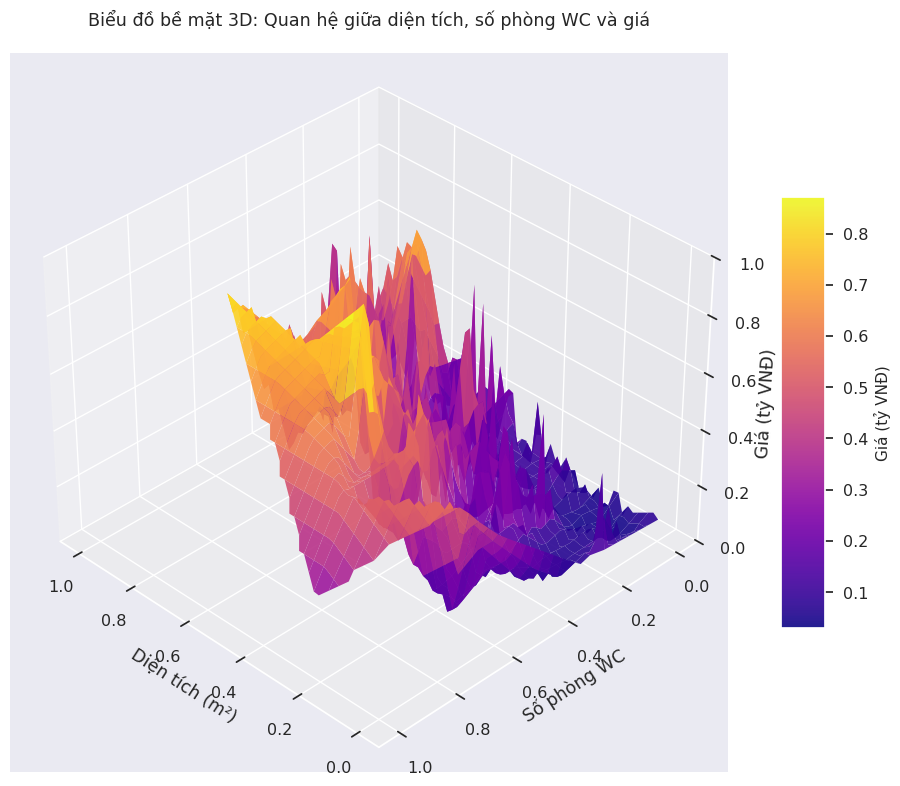

In [29]:
# 8️ SURFACE 3D - Diện tích, số phòng wc và đơn giá

from scipy.interpolate import griddata

# Lấy dữ liệu
data = df[['area', 'wc', 'price']].dropna()

# Tạo lưới
x = np.linspace(data['area'].min(), data['area'].max(), 60)
y = np.linspace(data['wc'].min(), data['wc'].max(), 60)
X, Y = np.meshgrid(x, y)

# Nội suy an toàn
Z = griddata(
    (data['area'], data['wc']),
    data['price'],
    (X, Y),
    method='linear'
)


# Vẽ biểu đồ
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(
    X, Y, Z,
    cmap='plasma',
    linewidth=0,
    antialiased=True,
    alpha=0.9
)

# Thanh màu
cbar = fig.colorbar(surf, shrink=0.6, aspect=10)
cbar.set_label("Giá (tỷ VNĐ)", fontsize=11)

# Nhãn trục
ax.set_xlabel("Diện tích (m²)")
ax.set_ylabel("Số phòng WC")
ax.set_zlabel("Giá (tỷ VNĐ)")
ax.set_title("Biểu đồ bề mặt 3D: Quan hệ giữa diện tích, số phòng WC và giá", pad=20)

# Giới hạn Z ≥ 0
ax.set_zlim(0, data['price'].max())

# Góc nhìn đẹp
ax.view_init(elev=35, azim=135)
plt.tight_layout()
plt.show()
